# Requirements

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [123]:
! pip install gdown==v4.6.3

In [124]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **count of page loads**. Your task involves employing bagging and boosting methods to forecast the **count of page loads**. To accomplish this, you will use data from the preceding three days, consisting of **count of page loads**, **count of unique visits**, **count of first time-visits**, **count of returning visits**, and the current **day**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Website Visitors Dataset

## Downloading the Website Visitors Dataset

In [125]:
!gdown 1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe
To: /content/website-visitors.csv
100% 92.8k/92.8k [00:00<00:00, 87.7MB/s]


## Exploring the Website Visitors Dataset
This datatset consists of daily counts of page loads, unique visitors, first-time visitors, and returning visitors for an academic teaching notes website. The dataset contains 2167 rows spanning from September 14, 2014, to August 19, 2020. A visit is defined as a series of hits on one or more pages by the same user on a given day, identified by IP address. Shared IP addresses are considered a single user. A visit is "unique" if a hit from the same IP address hasn't occurred within the last 6 hours. Returning visitors are identified by cookies, and the rest are classified as first-time visitors. The unique visitor count is the sum of returning and first-time visitors.

The dataset consists of the following columns:
- date - date in mm/dd/yyyy format,
- day_of_week - day of the week in text form (Monday, Tuesday, etc.),
- page_loads - daily number of pages loaded,
- unique_visits - daily number of visitors from IP addresses with no hits in over 6 hours,
- first_time_visits - number of unique visitors without a identifying cookie, and
- returning_visits - number of unique visitors minus first-time visitors.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [126]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('/content/website-visitors.csv')
df

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
0,9/14/2014,Sunday,2.146,1.582,1.430,152.0
1,9/15/2014,Monday,3.621,2.528,2.297,231.0
2,9/16/2014,Tuesday,3.698,2.630,2.352,278.0
3,9/17/2014,Wednesday,3.667,2.614,2.327,287.0
4,9/18/2014,Thursday,3.316,2.366,2.130,236.0
...,...,...,...,...,...,...
2162,8/15/2020,Saturday,2.221,1.696,1.373,323.0
2163,8/16/2020,Sunday,2.724,2.037,1.686,351.0
2164,8/17/2020,Monday,3.456,2.638,2.181,457.0
2165,8/18/2020,Tuesday,3.581,2.683,2.184,499.0


Explore the dataset using visualizations of your choice.

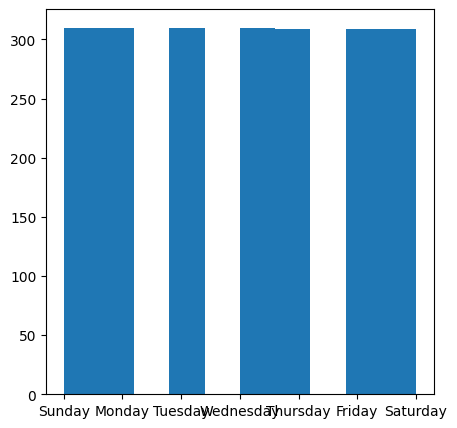

In [127]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(5, 5))
plt.hist(df['day_of_week'])
plt.show()

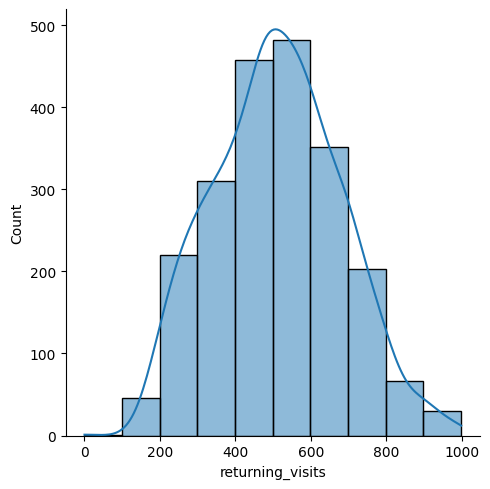

In [128]:
sns.displot(df['returning_visits'], kde=True, bins=10)
plt.show()

<ipython-input-129-753ca5bff919>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

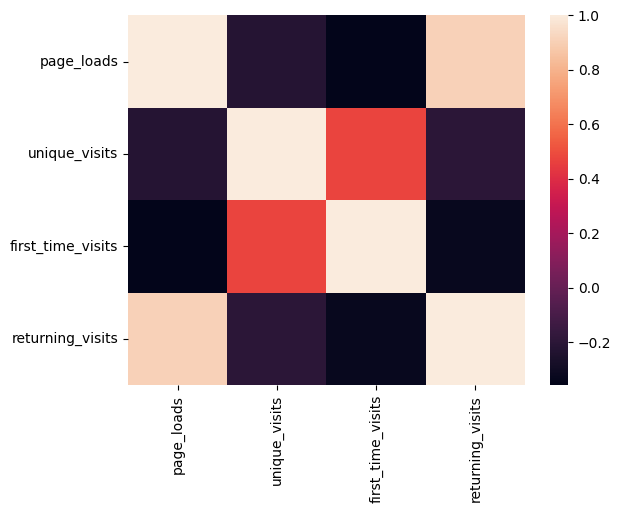

In [129]:
corr = df.corr()
sns.heatmap(corr)

Encode the categorical features.

# Write your code here. Add as many boxes as you need.


In [130]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['day_of_week'] = encoder.fit_transform(df['day_of_week'])
df['day_of_week'].value_counts()

3    310
1    310
5    310
6    310
4    309
0    309
2    309
Name: day_of_week, dtype: int64

# Feauture Extraction
Apply a lag of one, two, and three days to each chosen feature (except `day_of_week`), creating a set of features representing the statistics from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [131]:
# Write your code here. Add as many boxes as you need.
to_shift = []

for c in df.columns:
  if c != 'day_of_week' and c != 'date' and c != 'page_loads':
    to_shift.append(c)

to_shift

['unique_visits', 'first_time_visits', 'returning_visits']

In [132]:
lag = 3

for i in range(1, lag +1):
  for c in to_shift:
    df[f'{c}_prev_{i}'] = df[f'{c}'].shift(i)

df

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits,unique_visits_prev_1,first_time_visits_prev_1,returning_visits_prev_1,unique_visits_prev_2,first_time_visits_prev_2,returning_visits_prev_2,unique_visits_prev_3,first_time_visits_prev_3,returning_visits_prev_3
0,9/14/2014,3,2.146,1.582,1.430,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/15/2014,1,3.621,2.528,2.297,231.0,1.582,1.430,152.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9/16/2014,5,3.698,2.630,2.352,278.0,2.528,2.297,231.0,1.582,1.430,152.0,NaN,NaN,NaN
3,9/17/2014,6,3.667,2.614,2.327,287.0,2.630,2.352,278.0,2.528,2.297,231.0,1.582,1.430,152.0
4,9/18/2014,4,3.316,2.366,2.130,236.0,2.614,2.327,287.0,2.630,2.352,278.0,2.528,2.297,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,8/15/2020,2,2.221,1.696,1.373,323.0,2.308,1.922,386.0,2.780,2.322,458.0,2.904,2.477,427.0
2163,8/16/2020,3,2.724,2.037,1.686,351.0,1.696,1.373,323.0,2.308,1.922,386.0,2.780,2.322,458.0
2164,8/17/2020,1,3.456,2.638,2.181,457.0,2.037,1.686,351.0,1.696,1.373,323.0,2.308,1.922,386.0
2165,8/18/2020,5,3.581,2.683,2.184,499.0,2.638,2.181,457.0,2.037,1.686,351.0,1.696,1.373,323.0


In [133]:
df.isnull().sum()

date                        0
day_of_week                 0
page_loads                  0
unique_visits               0
first_time_visits           0
returning_visits            0
unique_visits_prev_1        1
first_time_visits_prev_1    1
returning_visits_prev_1     1
unique_visits_prev_2        2
first_time_visits_prev_2    2
returning_visits_prev_2     2
unique_visits_prev_3        3
first_time_visits_prev_3    3
returning_visits_prev_3     3
dtype: int64

In [134]:
df = df.dropna(axis = 0)

In [135]:
df.isnull().sum()

date                        0
day_of_week                 0
page_loads                  0
unique_visits               0
first_time_visits           0
returning_visits            0
unique_visits_prev_1        0
first_time_visits_prev_1    0
returning_visits_prev_1     0
unique_visits_prev_2        0
first_time_visits_prev_2    0
returning_visits_prev_2     0
unique_visits_prev_3        0
first_time_visits_prev_3    0
returning_visits_prev_3     0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [136]:
# Write your code here. Add as many boxes as you need.
features = []

for i in range(1, lag + 1):
  features.append(f'unique_visits_prev_{i}')
  features.append(f'first_time_visits_prev_{i}')
  features.append(f'returning_visits_prev_{i}')

features

['unique_visits_prev_1',
 'first_time_visits_prev_1',
 'returning_visits_prev_1',
 'unique_visits_prev_2',
 'first_time_visits_prev_2',
 'returning_visits_prev_2',
 'unique_visits_prev_3',
 'first_time_visits_prev_3',
 'returning_visits_prev_3']

In [137]:
df

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits,unique_visits_prev_1,first_time_visits_prev_1,returning_visits_prev_1,unique_visits_prev_2,first_time_visits_prev_2,returning_visits_prev_2,unique_visits_prev_3,first_time_visits_prev_3,returning_visits_prev_3
3,9/17/2014,6,3.667,2.614,2.327,287.0,2.630,2.352,278.0,2.528,2.297,231.0,1.582,1.430,152.0
4,9/18/2014,4,3.316,2.366,2.130,236.0,2.614,2.327,287.0,2.630,2.352,278.0,2.528,2.297,231.0
5,9/19/2014,0,2.815,1.863,1.622,241.0,2.366,2.130,236.0,2.614,2.327,287.0,2.630,2.352,278.0
6,9/20/2014,2,1.658,1.118,985.000,133.0,1.863,1.622,241.0,2.366,2.130,236.0,2.614,2.327,287.0
7,9/21/2014,3,2.288,1.656,1.481,175.0,1.118,985.000,133.0,1.863,1.622,241.0,2.366,2.130,236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,8/15/2020,2,2.221,1.696,1.373,323.0,2.308,1.922,386.0,2.780,2.322,458.0,2.904,2.477,427.0
2163,8/16/2020,3,2.724,2.037,1.686,351.0,1.696,1.373,323.0,2.308,1.922,386.0,2.780,2.322,458.0
2164,8/17/2020,1,3.456,2.638,2.181,457.0,2.037,1.686,351.0,1.696,1.373,323.0,2.308,1.922,386.0
2165,8/18/2020,5,3.581,2.683,2.184,499.0,2.638,2.181,457.0,2.037,1.686,351.0,1.696,1.373,323.0


In [138]:
X, Y = df[features], df['page_loads']
X

,unique_visits_prev_1,first_time_visits_prev_1,returning_visits_prev_1,unique_visits_prev_2,first_time_visits_prev_2,returning_visits_prev_2,unique_visits_prev_3,first_time_visits_prev_3,returning_visits_prev_3
3,2.630,2.352,278.0,2.528,2.297,231.0,1.582,1.430,152.0
4,2.614,2.327,287.0,2.630,2.352,278.0,2.528,2.297,231.0
5,2.366,2.130,236.0,2.614,2.327,287.0,2.630,2.352,278.0
6,1.863,1.622,241.0,2.366,2.130,236.0,2.614,2.327,287.0
7,1.118,985.000,133.0,1.863,1.622,241.0,2.366,2.130,236.0
...,...,...,...,...,...,...,...,...,...
2162,2.308,1.922,386.0,2.780,2.322,458.0,2.904,2.477,427.0
2163,1.696,1.373,323.0,2.308,1.922,386.0,2.780,2.322,458.0
2164,2.037,1.686,351.0,1.696,1.373,323.0,2.308,1.922,386.0
2165,2.638,2.181,457.0,2.037,1.686,351.0,1.696,1.373,323.0


In [139]:
Y

3       3.667
4       3.316
5       2.815
6       1.658
7       2.288
        ...  
2162    2.221
2163    2.724
2164    3.456
2165    3.581
2166    2.064
Name: page_loads, Length: 2164, dtype: float64

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [141]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1500, criterion='squared_error', max_depth=10)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=1500)

Use the trained model to make predictions for the test set.

In [142]:
# Write your code here. Add as many boxes as you need.
rf_pred = rf.predict(X_test)

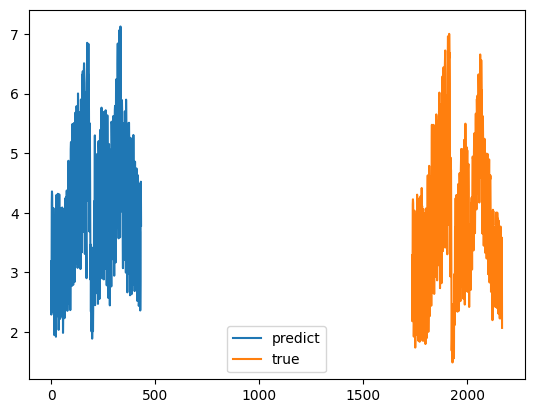

In [160]:
plt.plot(rf_pred, label='predict')
plt.plot(Y_test, label='true')
plt.legend()
plt.show()

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [143]:
# Write your code here. Add as many boxes as you need.
r2_score(rf_pred, Y_test)

0.776201785378631

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [144]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor

best_score = -999

for n_estimator in range(1, 10):
  for lr in np.arange(0.03, 0.1, 0.02):
    for md in range(1, 10, 2):
      model = XGBRegressor(objective ='reg:linear',
        colsample_bytree = 0.3, learning_rate = lr,
        max_depth = md, alpha = 2, n_estimators = n_estimator)
      model.fit(X_train, Y_train)
      y_pred = model.predict(X_test)
      if r2_score(y_pred, Y_test) > best_score:
        best_score = r2_score(y_pred, Y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:17:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:17:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:17:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:17:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

Use the trained model to make predictions for the test set.

In [145]:
# Write your code here. Add as many boxes as you need.
# y_pred = model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [146]:
# Write your code here. Add as many boxes as you need.
# ??????????
print(best_score)

-1.46508350516639


In [148]:
X_test.shape

(433, 9)

In [150]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)

In [152]:
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [153]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100,  activation='relu', return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

In [155]:
model.compile(loss='mae', optimizer='adam')

In [156]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=100, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/30
14/14 - 9s - loss: 2.8036 - val_loss: 2.0939 - 9s/epoch - 615ms/step
Epoch 2/30
14/14 - 0s - loss: 1.3588 - val_loss: 1.3407 - 445ms/epoch - 32ms/step
Epoch 3/30
14/14 - 0s - loss: 1.9374 - val_loss: 1.2411 - 400ms/epoch - 29ms/step
Epoch 4/30
14/14 - 0s - loss: 1.3937 - val_loss: 0.9024 - 394ms/epoch - 28ms/step
Epoch 5/30
14/14 - 0s - loss: 1.3070 - val_loss: 0.8548 - 419ms/epoch - 30ms/step
Epoch 6/30
14/14 - 0s - loss: 1.3071 - val_loss: 1.6125 - 398ms/epoch - 28ms/step
Epoch 7/30
14/14 - 0s - loss: 1.3383 - val_loss: 1.8102 - 423ms/epoch - 30ms/step
Epoch 8/30
14/14 - 0s - loss: 1.2751 - val_loss: 1.7183 - 398ms/epoch - 28ms/step
Epoch 9/30
14/14 - 0s - loss: 1.2173 - val_loss: 1.6047 - 413ms/epoch - 29ms/step
Epoch 10/30
14/14 - 0s - loss: 1.1254 - val_loss: 1.5957 - 416ms/epoch - 30ms/step
Epoch 11/30
14/14 - 0s - loss: 1.1021 - val_loss: 1.2754 - 400ms/epoch - 29ms/step
Epoch 12/30
14/14 - 0s - loss: 1.0766 - val_loss: 1.8974 - 438ms/epoch - 31ms/step
Epoch 13/30
14/

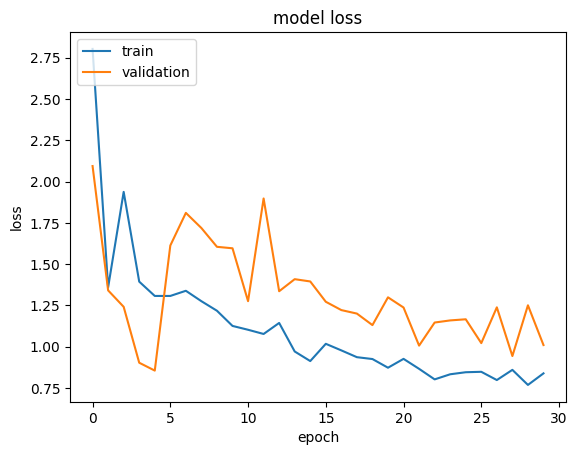

In [157]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

14/14 [==============================] - 1s 10ms/step


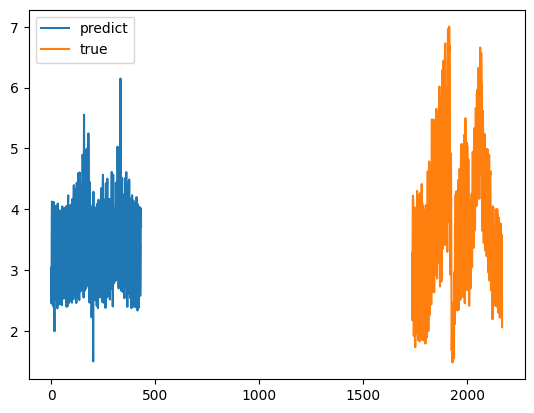

In [158]:
y_pred = model.predict(X_test)
plt.plot(y_pred, label='predict')
plt.plot(Y_test, label='true')
plt.legend()
plt.show()

In [159]:
r2_score(y_pred, Y_test)

-1.4508776645978667

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the max_depth (`max_depth`) for the Random Forest model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `max_depth` and evaluating the model's performance using cross-validation. Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Random Forest Hyperparameter
Experiment with various values for `max_depth` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.